In [1]:
!pip install pandas scikit-learn


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [6]:
!pip install pandas

import pandas as pd

# Load the dataset
url = 'https://datasets.imdbws.com/title.basics.tsv.gz'
movies = pd.read_csv(url, sep='\t', compression='gzip')

# Inspect the first few rows
print(movies.head())



<ipython-input-6-5c54ac06212d>:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv(url, sep='\t', compression='gzip')


      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1                     Short  


In [9]:
import pandas as pd

# Load the dataset
url = 'https://datasets.imdbws.com/title.basics.tsv.gz'
movies = pd.read_csv(url, sep='\t', compression='gzip', low_memory=False)

# Inspect the first few rows
print(movies.head())

# Combine features into a single string
movies['combined_features'] = movies.apply(lambda row: ' '.join(map(str, [row['genres'], row['primaryTitle']])), axis=1)

# Inspect the combined features
print(movies['combined_features'].head())

      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1                     Short  
0              Documentary,Short Carmencita
1    Animation,Short Le clown et ses chiens
2     Animation,Comedy,Romance Poor Pierr

In [13]:
# Assuming you have a DataFrame with a column 'combined_features'
# Let's create a sample DataFrame
data = {
    'combined_features': ['feature1 feature2', 'feature2 feature3', 'feature1 feature3']
}
df = pd.DataFrame(data)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the data and transform it into a matrix
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print(cosine_sim)



[[1.  0.5 0.5]
 [0.5 1.  0.5]
 [0.5 0.5 1. ]]


In [15]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get index of the movie that matches the title
    idx = movies.index[movies['title'] == title].tolist()[0]

    # Get pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]


In [17]:
# Assuming you have a DataFrame with movie data
# Let's create a sample DataFrame
data = {
    'title': ['The Dark Knight', 'The Avengers', 'The Dark Knight Rises', 'Batman Begins', 'Iron Man'],
    'genres': ['Action Crime Thriller', 'Action Sci-Fi', 'Action Thriller', 'Action Thriller', 'Action Sci-Fi']
}
df = pd.DataFrame(data)

# Combine features into a single string
df['combined_features'] = df['title'] + ' ' + df['genres']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the data and transform it into a matrix
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a function to get recommendations
def get_recommendations(title):
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Get top 5 recommendations
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

print(get_recommendations('The Dark Knight'))


2    The Dark Knight Rises
3            Batman Begins
1             The Avengers
4                 Iron Man
Name: title, dtype: object


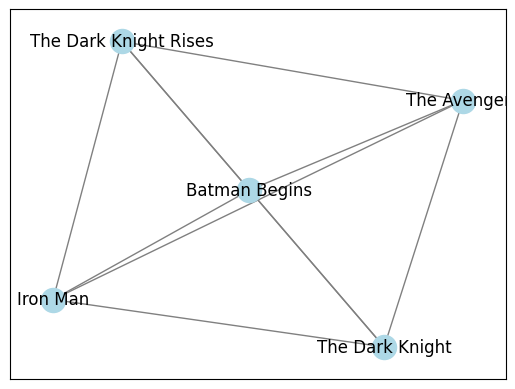

['The Avengers', 'The Dark Knight Rises', 'Batman Begins', 'Iron Man']


In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create a sample DataFrame with movie data
data = {
    'Movie': ['The Dark Knight', 'The Avengers', 'The Dark Knight Rises', 'Batman Begins', 'Iron Man'],
    'Genre': ['Action', 'Action', 'Action', 'Action', 'Action'],
    'Rating': [9.0, 8.5, 8.8, 8.2, 8.0]
}
df = pd.DataFrame(data)

# Create a graph
G = nx.Graph()

# Add nodes for movies
G.add_nodes_from(df['Movie'])

# Add edges between movies with similar genres
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if df.iloc[i]['Genre'] == df.iloc[j]['Genre']:
            G.add_edge(df.iloc[i]['Movie'], df.iloc[j]['Movie'])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

# Define a function to get recommendations
def get_recommendations(movie):
    neighbors = list(G.neighbors(movie))
    return neighbors

# Get recommendations for a movie
print(get_recommendations('The Dark Knight'))